In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

In [18]:
#Read Data into Jupyter

data = pd.read_csv('C://MS_Strath/MS983-Dissertation in DA/compas-scores-two-years-violent.csv')


In [19]:
data.info()
#It is used to get concise summary about the dataset, as a part of Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4743 non-null   int64  
 1   name                     4743 non-null   object 
 2   first                    4743 non-null   object 
 3   last                     4743 non-null   object 
 4   compas_screening_date    4743 non-null   object 
 5   sex                      4743 non-null   object 
 6   dob                      4743 non-null   object 
 7   age                      4743 non-null   int64  
 8   age_cat                  4743 non-null   object 
 9   race                     4743 non-null   object 
 10  juv_fel_count            4743 non-null   int64  
 11  decile_score             4743 non-null   int64  
 12  juv_misd_count           4743 non-null   int64  
 13  juv_other_count          4743 non-null   int64  
 14  priors_count            

In [20]:
data.shape
#To get the dimension of the "two-year-violent" dataset

(4743, 53)

In [21]:
data.isnull().sum()
#To get the total no of null entries for each feature in the dataset

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     268
c_jail_in                   268
c_jail_out                  268
c_case_number                11
c_offense_date              771
c_arrest_date              3983
c_days_from_compas           11
c_charge_degree               0
c_charge_desc                17
is_recid                      0
r_case_number              3748
r_charge_degree            3748
r_days_from_arrest         4053
r_offense_date             3748
r_charge_desc              3771
r_jail_in                  4053
r_jail_o

In [22]:
#Observing null value as total percentage of length of dataset
data.isnull().sum() * 100/len(data)

id                           0.000000
name                         0.000000
first                        0.000000
last                         0.000000
compas_screening_date        0.000000
sex                          0.000000
dob                          0.000000
age                          0.000000
age_cat                      0.000000
race                         0.000000
juv_fel_count                0.000000
decile_score                 0.000000
juv_misd_count               0.000000
juv_other_count              0.000000
priors_count                 0.000000
days_b_screening_arrest      5.650432
c_jail_in                    5.650432
c_jail_out                   5.650432
c_case_number                0.231921
c_offense_date              16.255534
c_arrest_date               83.976386
c_days_from_compas           0.231921
c_charge_degree              0.000000
c_charge_desc                0.358423
is_recid                     0.000000
r_case_number               79.021716
r_charge_deg

In [23]:
#Removing all the features from dataset having more than 50% entries as 'null entries'
data.drop(columns=['c_arrest_date','r_case_number','r_charge_degree','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out','violent_recid','vr_case_number','vr_charge_degree','vr_offense_date','vr_charge_desc'],inplace = True)

In [24]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

data[numerical_features].head()  #looking for total number of numerical features in dataset 

Number of numerical variables:  18


,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
0,1,69,0,1,0,0,0,-1.0,1.0,0,0,1,1,0,0,327,0,0
1,3,34,0,3,0,0,0,-1.0,1.0,1,1,3,1,0,9,159,1,1
2,5,23,0,8,1,0,1,NaN,1.0,0,0,8,6,1,0,1174,0,0
3,6,43,0,1,0,0,2,NaN,76.0,0,0,1,1,2,0,1102,0,0
4,7,44,0,1,0,0,0,0.0,0.0,0,0,1,1,0,1,853,0,0


In [25]:
pd.value_counts(data.sex)
#Gender Distribution for all the unique entries in the database

Male      3746
Female     997
Name: sex, dtype: int64

78.9795458316803
21.020451188087463


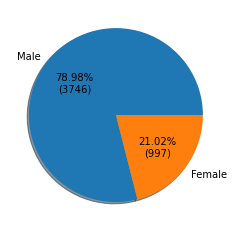

In [10]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = pd.value_counts(data.sex)
total = len(data)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True);

In [11]:
pd.value_counts(data.race)
#To get the Race Distribution for all the criminal entries of the database

African-American    2266
Caucasian           1701
Hispanic             458
Other                280
Asian                 27
Native American       11
Name: race, dtype: int64

47.775670886039734
35.86337864398956
9.656335413455963
5.903436616063118
0.5692599806934595
0.23192071821540594


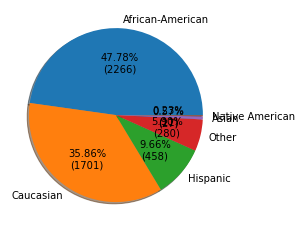

In [12]:

v_countsrace = pd.value_counts(data.race)
total = len(data)
fig = plt.figure()
plt.pie(v_countsrace, labels=v_countsrace.index, autopct=my_fmt, shadow=True);

In [13]:
pd.value_counts(data.score_text)
#To get the distribution of a criminal re-comitting a crime based on the decile score generated by the COMPAS algorithm

Low       2939
Medium    1120
High       679
Name: score_text, dtype: int64

In [14]:
# Cross-table analysis to show the relation between the decile score as generated by the COMPAS algorithm
# and the corresponding severity based on the score
data_crstab = pd.crosstab(data['decile_score'],
                            data['score_text'], 
                               margins = True)
print(data_crstab)

score_text    High   Low  Medium   All
decile_score                          
1                0  1204       0  1204
2                0   705       0   705
3                0   524       0   524
4                0   506       0   506
5                0     0     429   429
6                0     0     359   359
7                0     0     332   332
8              252     0       0   252
9              246     0       0   246
10             181     0       0   181
All            679  2939    1120  4738


62.03039288520813
23.638665676116943
14.330941438674927


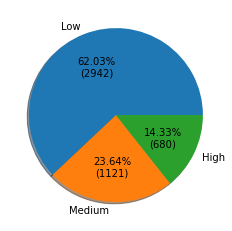

In [15]:

v_countsdec = pd.value_counts(data.score_text)
total = len(data)
fig = plt.figure()
plt.pie(v_countsdec, labels=v_countsdec.index, autopct=my_fmt, shadow=True);

In [16]:
pd.value_counts(data.two_year_recid)
# Actual Distribution of the people re-comitting a crime within the 2 years time period

0    3968
1     775
Name: two_year_recid, dtype: int64

In [28]:
data_crstab1 = pd.crosstab(data['decile_score'],
                            data['two_year_recid'], 
                               margins = True)
print(data_crstab1)

# Cross-table analysis showing the distribution of the decile score as compared to the actual indicator for violent recidivism
# within the 2 year time-period

two_year_recid     0    1   All
decile_score                   
-1                 5    0     5
1               1132   72  1204
2                648   57   705
3                466   58   524
4                435   71   506
5                355   74   429
6                283   76   359
7                242   90   332
8                162   90   252
9                153   93   246
10                87   94   181
All             3968  775  4743


In [29]:
data_crstab2 = pd.crosstab(data['is_recid'],
                            data['two_year_recid'], 
                               margins = True)
print(data_crstab2)

two_year_recid     0    1   All
is_recid                       
0               3748    0  3748
1                220  775   995
All             3968  775  4743


In [30]:
pd.value_counts(data.is_recid)

0    3748
1     995
Name: is_recid, dtype: int64

In [31]:
pd.value_counts(data.age_cat)

# Analysis showing the distribution of the defendants based on their age category.

25 - 45            2699
Greater than 45    1169
Less than 25        875
Name: age_cat, dtype: int64

56.90491199493408
24.646848440170288
18.44823956489563


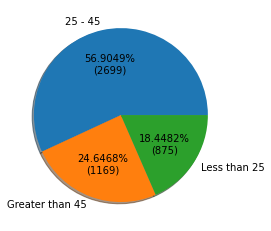

In [32]:

v_countsage = pd.value_counts(data.age_cat)
total = len(data)
fig = plt.figure()
plt.pie(v_countsage, labels=v_countsage.index, autopct=my_fmt, shadow=True);

In [33]:
data_crstab = pd.crosstab(data['age_cat'],
                            data['two_year_recid'],                             
                               margins = True)
print(data_crstab)
#Cross-table showing the distribution of actual recidivism based on the Age Category , here we can see that people within the age 25-45 
#has the highest positive cases of recidivism

two_year_recid      0    1   All
age_cat                         
25 - 45          2221  478  2699
Greater than 45  1082   87  1169
Less than 25      665  210   875
All              3968  775  4743


In [34]:
recid = data.groupby(["age_cat", "sex", "race"])["two_year_recid"].mean().unstack(level="race")
recid
#table analysis showing the mean chances of recidivism based on gender,age and Race

race                    African-American     Asian  Caucasian  Hispanic  \
age_cat         sex                                                       
25 - 45         Female          0.131673  0.000000   0.091371  0.125000   
                Male            0.232877  0.083333   0.159763  0.136364   
Greater than 45 Female          0.042254       NaN   0.037037  0.000000   
                Male            0.120743  0.000000   0.073497  0.050505   
Less than 25    Female          0.154545       NaN   0.117647  0.166667   
                Male            0.310881  0.428571   0.210227  0.163934   

race                    Native American     Other  
age_cat         sex                                
25 - 45         Female              NaN  0.034483  
                Male           0.222222  0.152672  
Greater than 45 Female         0.000000  0.000000  
                Male                NaN  0.037736  
Less than 25    Female              NaN  0.076923  
                Male           1.000000  0.268293

In [35]:
dec_scr = data.groupby(["age_cat", "sex", "race"])["decile_score"].mean().unstack(level="race")
dec_scr
#table analysis showing the mean decile score based on gender,age and Race

race                    African-American     Asian  Caucasian  Hispanic  \
age_cat         sex                                                       
25 - 45         Female          4.120996  1.000000   3.558376  2.916667   
                Male            5.027397  2.416667   3.547337  3.127273   
Greater than 45 Female          2.873239       NaN   2.059259  1.555556   
                Male            3.749226  1.142857   1.895323  2.070707   
Less than 25    Female          5.672727       NaN   5.750000  4.416667   
                Male            5.981865  4.571429   5.085227  5.459016   

race                    Native American     Other  
age_cat         sex                                
25 - 45         Female              NaN  2.000000  
                Male           5.111111  2.587786  
Greater than 45 Female         2.000000  0.923077  
                Male                NaN  1.301887  
Less than 25    Female              NaN  4.769231  
                Male           9.000000  5.585366

Text(0.5, 0.98, 'Score Frequency by Race')

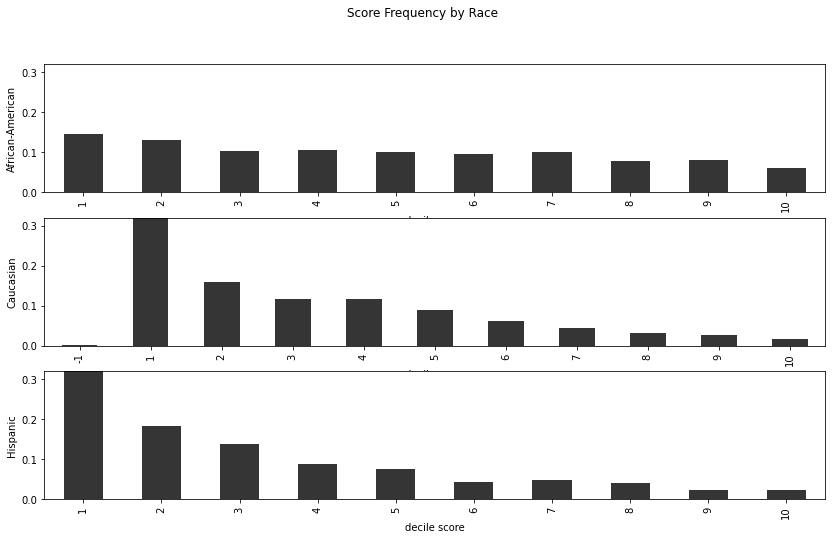

In [36]:
#Bar chart showing distribution of the COMPAS generated decile score for the three most popular races in the dataset,
#i.e African-American, Hispanic and Caucasian

dfgb = data.groupby("race")
race_count = data.groupby("race")["name"].count()

fig, ax = plt.subplots(3, figsize=(14, 8))

for (i, race) in enumerate(["African-American", "Caucasian", "Hispanic"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("decile score")
    # set equal y limit for visual comparison
    ax[i].set_ylim(0, 0.32)

fig.suptitle("Score Frequency by Race")

In [37]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

#checking for all the categorical features present in the dataset

['name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age_cat',
 'race',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_charge_degree',
 'c_charge_desc',
 'type_of_assessment',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody']

In [38]:
#checking for total no of categories for each categorical feature in the dataset

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is name and number of categories are 4721
The feature is first and number of categories are 2114
The feature is last and number of categories are 2897
The feature is compas_screening_date and number of categories are 586
The feature is sex and number of categories are 2
The feature is dob and number of categories are 3978
The feature is age_cat and number of categories are 3
The feature is race and number of categories are 6
The feature is c_jail_in and number of categories are 4447
The feature is c_jail_out and number of categories are 4098
The feature is c_case_number and number of categories are 4733
The feature is c_offense_date and number of categories are 767
The feature is c_charge_degree and number of categories are 2
The feature is c_charge_desc and number of categories are 363
The feature is type_of_assessment and number of categories are 1
The feature is score_text and number of categories are 4
The feature is screening_date and number of categories are 586
The f

In [39]:
data.drop(columns=['id','name','first','last','compas_screening_date','dob','c_jail_in','c_jail_out','c_case_number','c_offense_date','c_charge_desc','screening_date','screening_date','v_screening_date','in_custody','out_custody'], inplace= True, axis = 1)
#dropping the above categorical features because of having higher dimensions of category, since extreme high level categories is unwanted for building classification model

In [40]:
categorical_features1=[feature for feature in data.columns if data[feature].dtypes=='O']


for feature in categorical_features1:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is sex and number of categories are 2
The feature is age_cat and number of categories are 3
The feature is race and number of categories are 6
The feature is c_charge_degree and number of categories are 2
The feature is type_of_assessment and number of categories are 1
The feature is score_text and number of categories are 4
The feature is v_type_of_assessment and number of categories are 1
The feature is v_score_text and number of categories are 3


In [41]:
lab_enc = LabelEncoder()
data['sex'] = lab_enc.fit_transform(data['sex'])  
data['age_cat'] = lab_enc.fit_transform(data['age_cat']) 
data['race'] = lab_enc.fit_transform(data['race']) 
data['c_charge_degree'] = lab_enc.fit_transform(data['c_charge_degree']) 
data['type_of_assessment'] = lab_enc.fit_transform(data['type_of_assessment'])
data['score_text'] = lab_enc.fit_transform(data['score_text'])
data['v_type_of_assessment'] = lab_enc.fit_transform(data['v_type_of_assessment'])
data['v_score_text'] = lab_enc.fit_transform(data['v_score_text'])

# All categorical features are converted to numerical features using Label Encoder so that they can be passed on to the 
# Random Forest Algorithm

In [42]:
data.head()
#Checking for reslts after Label Encoding Categorical features

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
0,1,69,1,5,0,1,0,0,0,-1.0,...,1,1,0,1,1,0,0,327,0,0
1,1,34,0,0,0,3,0,0,0,-1.0,...,3,1,0,1,1,0,9,159,1,1
2,1,23,2,0,0,8,1,0,1,NaN,...,8,0,0,6,2,1,0,1174,0,0
3,1,43,0,5,0,1,0,0,2,NaN,...,1,1,0,1,1,2,0,1102,0,0
4,1,44,0,5,0,1,0,0,0,0.0,...,1,1,0,1,1,0,1,853,0,0


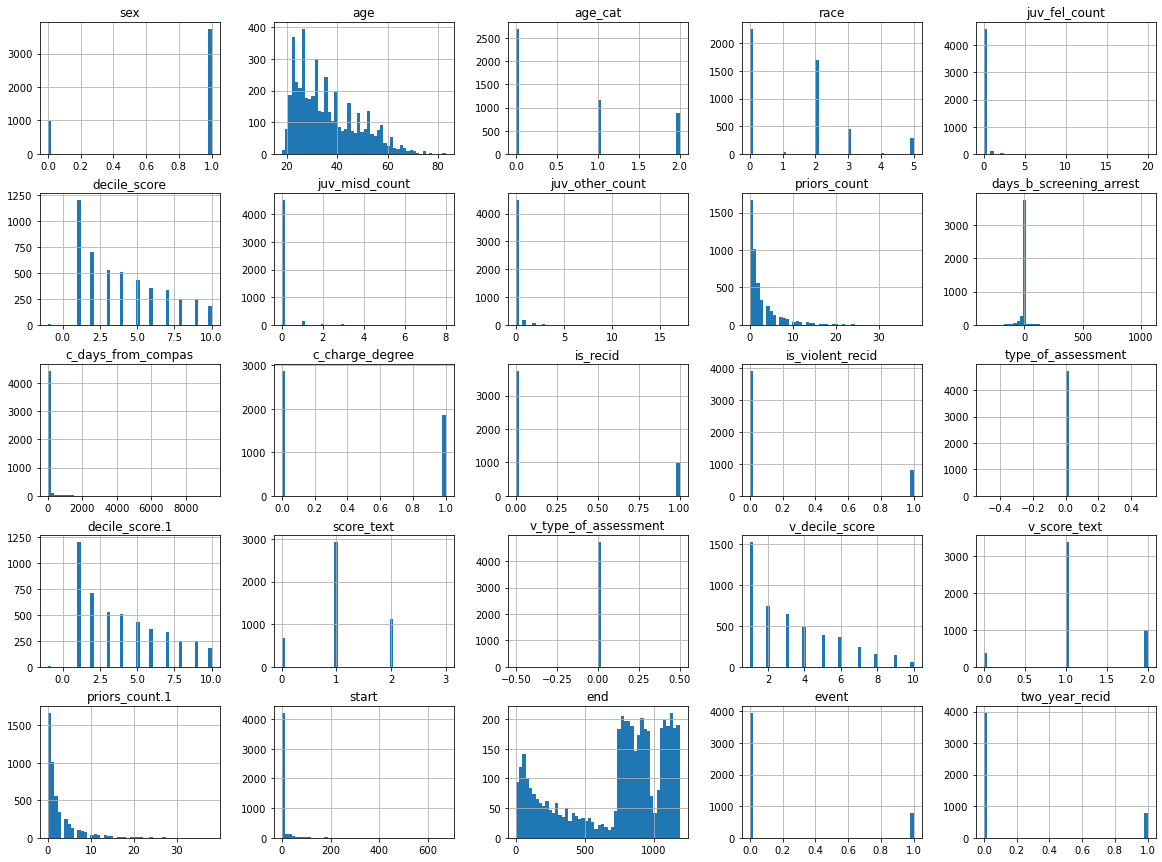

In [43]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

#Histogram showing distribution of value for all the features in the dataset

In [37]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(25, 20)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = 1.0,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 10})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

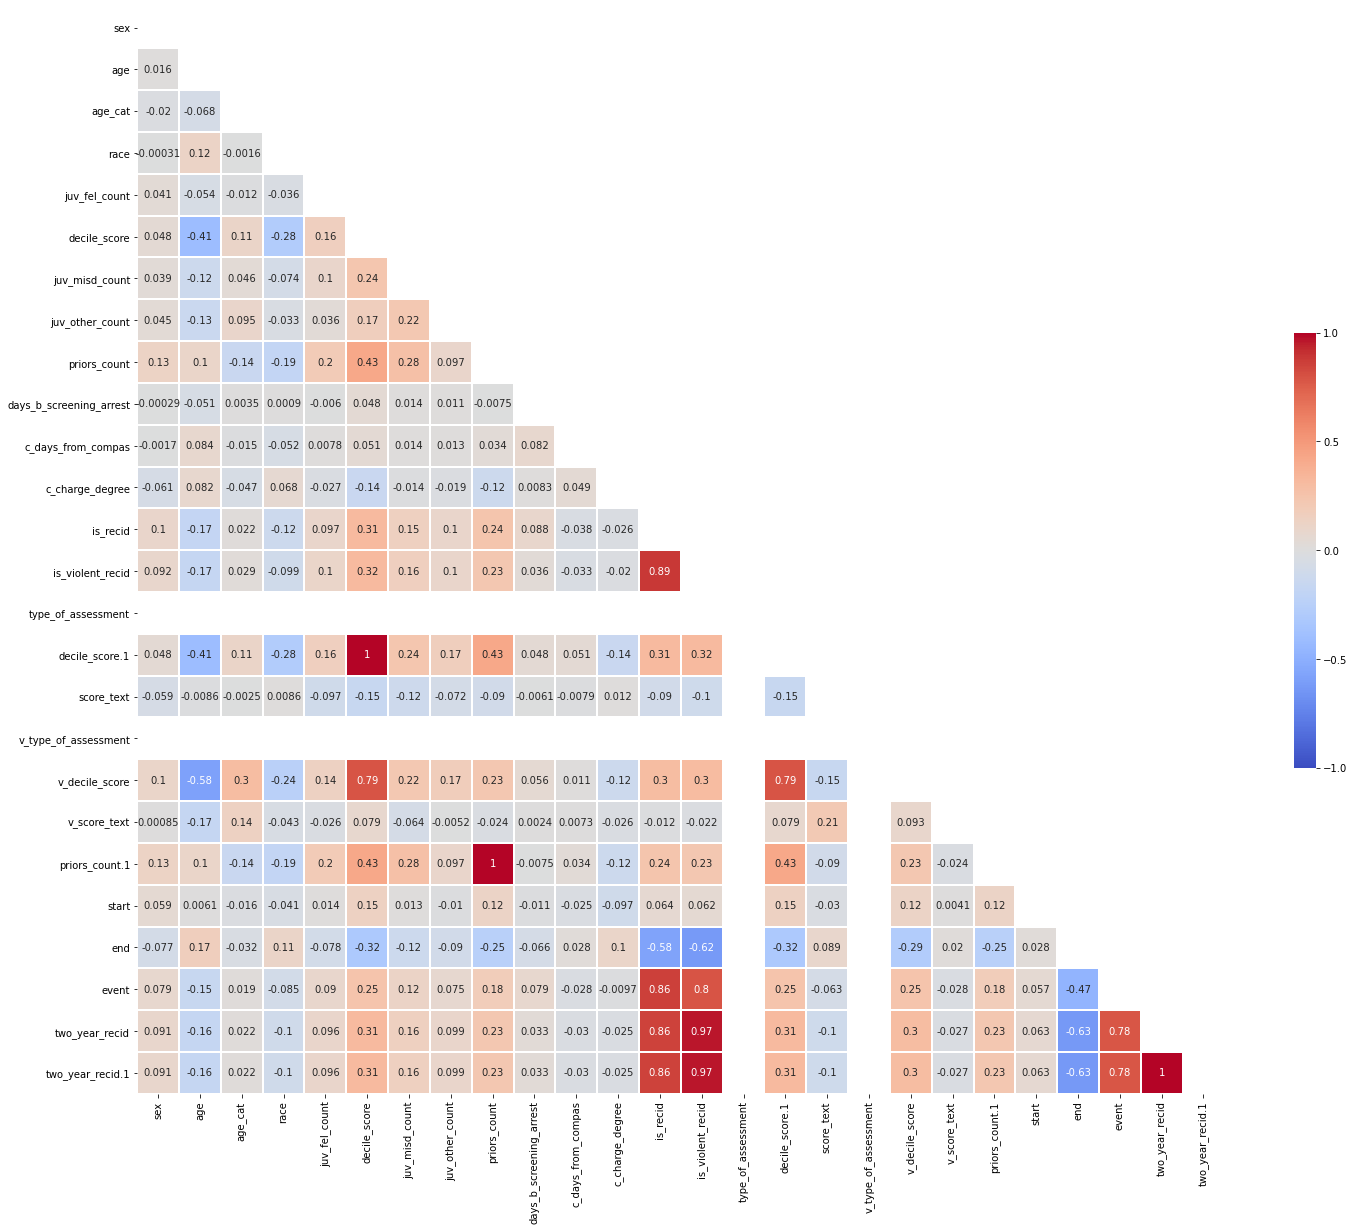

In [38]:
corr_heatmap(data)
# Heatmap showing correlation between different fetaures with one another,looking at this correlation heatmap, we decide to drop,
# features with more than 50% correlation with the output feature i.e two_year_recid

In [39]:
data.isnull().sum()
#Checking for total no of null entries left in the dataset for all the left features.

sex                          0
age                          0
age_cat                      0
race                         0
juv_fel_count                0
decile_score                 0
juv_misd_count               0
juv_other_count              0
priors_count                 0
days_b_screening_arrest    268
c_days_from_compas          11
c_charge_degree              0
is_recid                     0
is_violent_recid             0
type_of_assessment           0
decile_score.1               0
score_text                   0
v_type_of_assessment         0
v_decile_score               0
v_score_text                 0
priors_count.1               0
start                        0
end                          0
event                        0
two_year_recid               0
two_year_recid.1             0
dtype: int64

In [40]:
data['days_b_screening_arrest'].fillna(int(data['days_b_screening_arrest'].mean()), inplace=True)
# 'days_b_screening_arrest' feature has 268 null entries these null entries are replaced here with the mean value fpr the feature.

In [41]:
data['c_days_from_compas'].fillna(int(data['c_days_from_compas'].mean()),inplace=True)
# 'c_days_from_compas' has 11 null entries which are replaced by the mean value for the feature.

In [80]:
#Function to plot the feature importances for the rnadom Forest Algorithm

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [42]:
#Input and output feature list are defined below and are separated into 2 separate datasets
features = ["sex","age","age_cat","race","decile_score","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X = data[features].values
data_Y = data['two_year_recid'].values

In [43]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y, test_size=0.2, random_state=42)

In [82]:
#the random forest algorithm and its parameters are defined here

rand_forr = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr.fit(X_train,Y_train) #Random Forest classifier is run with all sensitive input features like Sex and Race for Violent Recidivism

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [83]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made.

Y_pred = rand_forr.predict(X_train)
print("Accuracy Score: ", accuracy_score(Y_train, Y_pred))

Accuracy Score:  0.8597785977859779


In [84]:
#The accuracy for the test set is made and the predictions based on the test set is made here, here we can see since the accuracy
# of the test set is similar and slightly lower than the training set, which indicated that our model is not overfitting.
Y_Predicted = rand_forr.predict(X_test)
print("Accuracy score: " ,accuracy_score(Y_test, Y_Predicted))

Accuracy score:  0.8408851422550052


In [118]:
# Evaluation Report on train set
print(metrics.classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3183
           1       0.79      0.16      0.27       611

    accuracy                           0.86      3794
   macro avg       0.82      0.58      0.59      3794
weighted avg       0.85      0.86      0.82      3794



In [85]:
# Evaluation Report on test set
print(metrics.classification_report(Y_test, Y_Predicted))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       785
           1       0.70      0.14      0.23       164

    accuracy                           0.84       949
   macro avg       0.77      0.56      0.57       949
weighted avg       0.82      0.84      0.79       949



In [126]:
#Confusion Matrix on the training set and it's corresponding prediction
print(metrics.confusion_matrix(Y_train,Y_pred))

[[3156   27]
 [ 512   99]]


In [86]:
#Confusion Matrix on the test set and it's corresponding prediction
print(metrics.confusion_matrix(Y_test,Y_Predicted))

[[775  10]
 [141  23]]


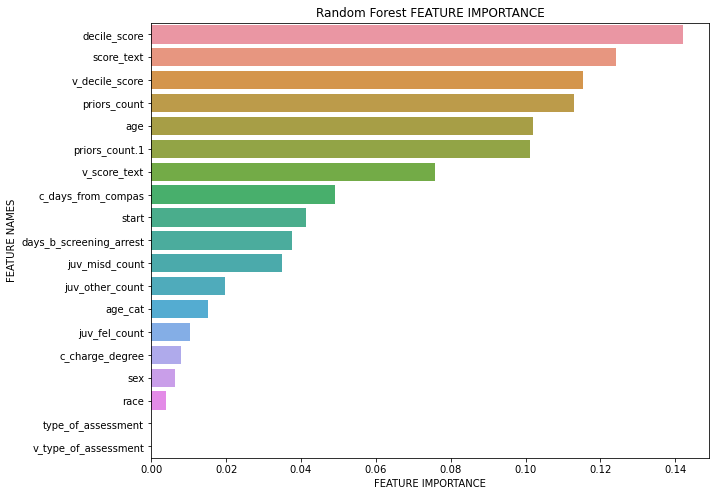

In [135]:
feat_imp = rand_forr.feature_importances_
mod_nm ='Random Forest'
plot_feature_importance(feat_imp,features,mod_nm)

In [98]:
#Input and output feature list are defined below and are separated into 2 separate datasets here the sensitive features i.e sex and race
# are dropped from the feature list
features_sens = ["age","age_cat","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X1 = data[features_sens].values
data_Y1 = data['two_year_recid'].values

In [122]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(data_X1,data_Y1, test_size=0.2, random_state=42)

In [123]:
rand_forr1 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr1.fit(X_train1,Y_train1) #Random Forest algorithm is run without sex and race input feature for Violent recidivism dataset

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [124]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made.

Y_pred_sens = rand_forr1.predict(X_train1)
print("Accuracy score: " ,accuracy_score(Y_train1, Y_pred_sens))

Accuracy score:  0.8579335793357934


In [125]:
#The accuracy for the test set is made and the predictions based on the test set is made here, here we can see since the accuracy
# of the test set is similar and slightly lower than the training set, which indicated that our model is not overfitting.

Y_Predicted_sens = rand_forr1.predict(X_test1)
print("Accuracy score: " ,accuracy_score(Y_test1, Y_Predicted_sens))

Accuracy score:  0.845100105374078


In [127]:
# Evaluation Report on train set

print(metrics.classification_report(Y_train1, Y_pred_sens))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3183
           1       0.79      0.16      0.27       611

    accuracy                           0.86      3794
   macro avg       0.82      0.58      0.59      3794
weighted avg       0.85      0.86      0.82      3794



In [128]:
# Evaluation Report on test set

print(metrics.classification_report(Y_test1, Y_Predicted_sens))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       785
           1       0.74      0.16      0.26       164

    accuracy                           0.85       949
   macro avg       0.80      0.57      0.59       949
weighted avg       0.83      0.85      0.80       949



In [129]:
#Confusion Matrix on the training set and it's corresponding prediction

print(metrics.confusion_matrix(Y_train1, Y_pred_sens))

[[3156   27]
 [ 512   99]]


In [130]:
#Confusion Matrix on the test set and it's corresponding prediction

print(metrics.confusion_matrix(Y_test1, Y_Predicted_sens))

[[776   9]
 [138  26]]


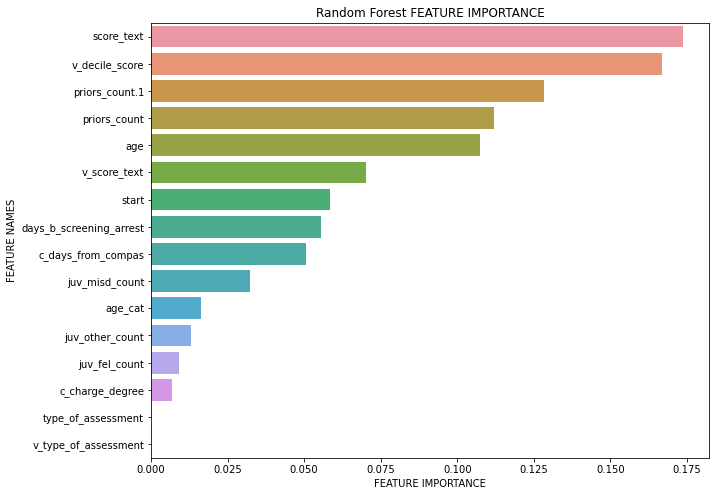

In [107]:
#Feature importance is plotted for the 2nd Random forest model

feat_imp1 = rand_forr1.feature_importances_

plot_feature_importance(feat_imp1,features_sens,mod_nm)

<AxesSubplot:>

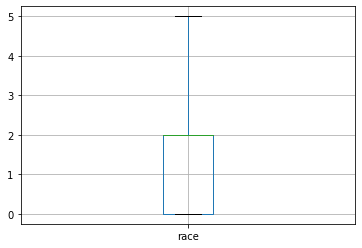

In [59]:
#Box-plot to show value outliers for the feature 'race'
data.boxplot(column = 'race')

In [60]:
#Function to augment the input features having imbalanced data specially for imbalanced sensitive categorical feature like race
def upsample_classes(Data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

In [61]:
# The race feature is passed through upsample_Classes function to make the imbalanced race feature balanced thus removing biasedness 
# from the race feature
data1 = upsample_classes(data,'race')

In [63]:
pd.value_counts(data1.race)

#The race is balanced for all race categories

5    2266
4    2266
3    2266
2    2266
1    2266
0    2266
Name: race, dtype: int64

In [109]:
#Input and output feature list are defined below and are separated into 2 separate datasets here the sensitive feature race is balanced
# and passed as input feature
features_bal = ["sex","age","age_cat","race","decile_score","juv_fel_count","juv_misd_count","juv_other_count","priors_count","days_b_screening_arrest","c_days_from_compas","c_charge_degree","type_of_assessment","score_text","v_type_of_assessment","v_decile_score","v_score_text","priors_count.1","start"]
data_X2 = data1[features_bal].values
data_Y2 = data1['two_year_recid'].values

In [110]:
#train_test_split is used from scikit-learn package the dataset with input feature and the dataset with output feature are
# separated into train and test set, where train set has 80% observations from the original dataset and test has 20% observations.


X_train2,X_test2,Y_train2,Y_test2 = train_test_split(data_X2,data_Y2, test_size=0.2, random_state=42)

In [111]:
rand_forr2 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
rand_forr2.fit(X_train2,Y_train2) #Random Forest algorithm is run with sex and race input feature which is balanced using resampling techniques

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [112]:
# the Accuracy for the training set is checked and also the predictions based on the training set is also made for 3rd model

Y_Pred_bal = rand_forr2.predict(X_train2)
print("Accuracy score: " ,accuracy_score(Y_train2, Y_Pred_bal))

Accuracy score:  0.9153181316660537


In [131]:
#The accuracy for the test set is made and the predictions based on the test set is made here for the 3rd model, here we can see since the accuracy
# of the test set is similar and slightly lower than the training set, which indicated that our model is not overfitting.

Y_Predicted_bal = rand_forr2.predict(X_test2)
print("Accuracy score: " ,accuracy_score(Y_test2, Y_Predicted_bal))

Accuracy score:  0.9113970588235294


In [114]:
pd.value_counts(Y_Predicted_bal)

0    2467
1     253
dtype: int64

In [117]:
pd.value_counts(Y_test2)

0    2262
1     458
dtype: int64

In [132]:
# Evaluation Report on train set

print(metrics.classification_report(Y_train2, Y_Pred_bal))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9053
           1       0.96      0.52      0.67      1823

    accuracy                           0.92     10876
   macro avg       0.94      0.76      0.81     10876
weighted avg       0.92      0.92      0.90     10876



In [115]:
# Evaluation Report on test set

print(metrics.classification_report(Y_test2, Y_Predicted_bal))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2262
           1       0.93      0.51      0.66       458

    accuracy                           0.91      2720
   macro avg       0.92      0.75      0.81      2720
weighted avg       0.91      0.91      0.90      2720



In [133]:
# Confusion Matrix on the training set and it's corresponding prediction

print(metrics.confusion_matrix(Y_train2, Y_Pred_bal))

[[9014   39]
 [ 882  941]]


In [71]:
# Confusion Matrix on the test set and it's corresponding prediction

print(metrics.confusion_matrix(Y_test2, Y_Predicted_bal))

[[2244   18]
 [ 223  235]]


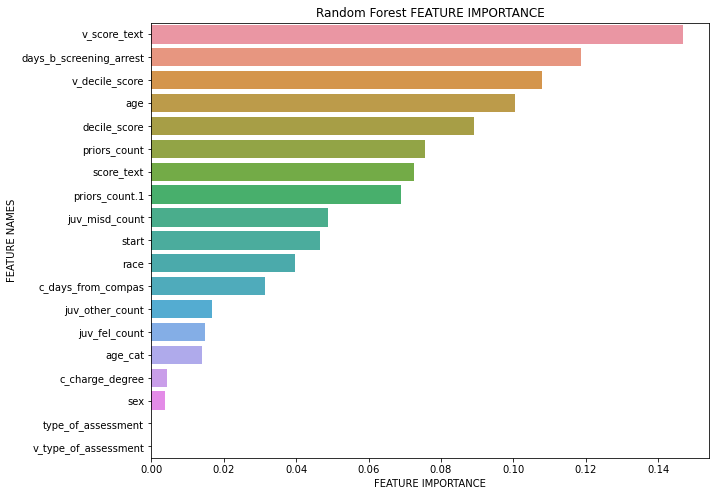

In [116]:
#Feature importance is plotted for the 3rd Random forest model

feat_imp2 = rand_forr2.feature_importances_

plot_feature_importance(feat_imp2,features_bal,mod_nm)

In [37]:
import imblearn
imblearn.__version__

'0.8.0'